In [14]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [15]:
dataframe = pd.read_excel("fitur_quality.xlsx")
dataframe

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,NaN,44.931388,589.049127,913.196598,532.391593,92.146597,0.088867,0.236328,0.502044,645.726979,522.580222,0.809290,0
105,NaN,59.490622,135.610427,64.607791,38.978432,47.916667,0.040039,0.272461,0.203282,45.676245,185.530246,4.061854,0
106,NaN,61.123084,127.522659,104.882885,75.627238,53.355705,0.044922,0.254883,2.447448,74.162843,164.121556,2.212989,0
107,NaN,64.437932,55.039434,52.842236,30.052714,38.993711,0.054688,0.219727,0.359295,37.364273,67.390739,1.803614,0


In [17]:
# X = dataframe[["HF", "LF/HF", "HR", "SDSD", "SD2", "LF", "pNN50", "SDNN"]]
X = dataframe[["HF", "LF/HF", "HR", "SDSD", "SD2", "LF", "pNN50"]]

num_feature = len(X.columns)


y = dataframe["Label"]

In [18]:
smote = SMOTE(random_state=42)
data_resampled, labels_resampled = smote.fit_resample(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data_resampled, labels_resampled, test_size=0.1, shuffle=True
)

In [32]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=32, input_shape=(num_feature,), activation="relu"),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.2)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4297 - loss: 7.4438 - val_accuracy: 0.5455 - val_loss: 4.9709
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4695 - loss: 6.4920 - val_accuracy: 0.5455 - val_loss: 4.5720
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5404 - loss: 5.2757 - val_accuracy: 0.5455 - val_loss: 4.1653
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4778 - loss: 4.9177 - val_accuracy: 0.5455 - val_loss: 3.7517
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4828 - loss: 4.8906 - val_accuracy: 0.5455 - val_loss: 3.3266
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4876 - loss: 4.0953 - val_accuracy: 0.5455 - val_loss: 2.9162
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4954 - loss: 3.6442 - val_accuracy: 0.5758 - val_loss: 2.5166
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5345 - loss: 3.1781 - val_accuracy: 0.5758 - 

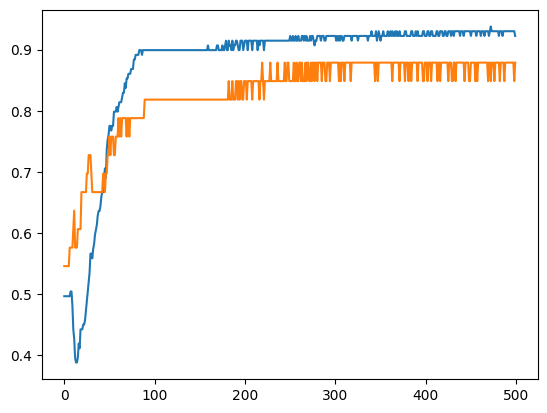

In [34]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print(f"Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0907
Loss: 0.09065783023834229
Accuracy: 1.0000


In [36]:
X_test

,HF,LF/HF,HR,SDSD,SD2,LF,pNN50
64,0.269531,0.372992,60.945152,24.982149,42.608415,0.042969,31.893688
96,0.197266,1.958489,62.065128,104.469758,216.790101,0.053711,42.140468
58,0.257812,0.031822,63.008335,35.704471,45.740866,0.047852,50.641026
138,0.150391,2.524383,36.798574,266.913292,255.172339,0.083466,60.943374
132,0.197189,3.094492,36.363654,82.999740,255.688849,0.043997,60.160991
95,0.313477,1.165689,65.522376,18.968948,35.022208,0.059570,4.938272
143,0.150391,2.960023,36.562022,199.131380,212.433471,0.042260,56.273478
17,0.150391,2.307459,37.751088,272.077789,249.862232,0.099609,57.952070
118,0.153442,2.254700,39.575221,154.224520,184.360524,0.044540,56.389470
99,0.351562,0.314684,58.863359,42.071432,55.628853,0.056641,65.979381


In [37]:
prediction = model.predict(X_test)
predicted_labels = (prediction > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Text(113.9222222222222, 0.5, 'predicted class')

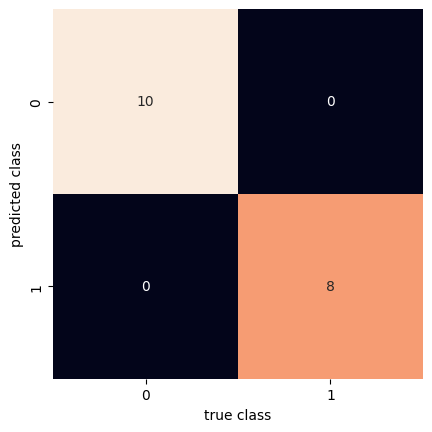

In [38]:
conmat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")